In [129]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Stroke Prediction

You can see the data and other details [here](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

**EDA**

In [99]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [100]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [101]:
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [102]:
df.bmi = df.bmi.fillna(df.bmi.mean())

In [103]:
numerical = df[["age", "avg_glucose_level", "bmi"]]

In [104]:
categorical = df[["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

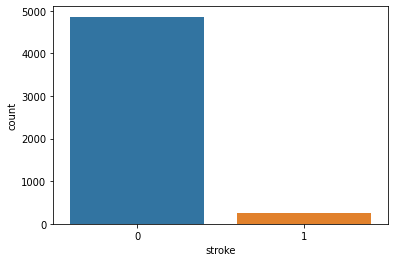

In [105]:
sns.countplot(df["stroke"])

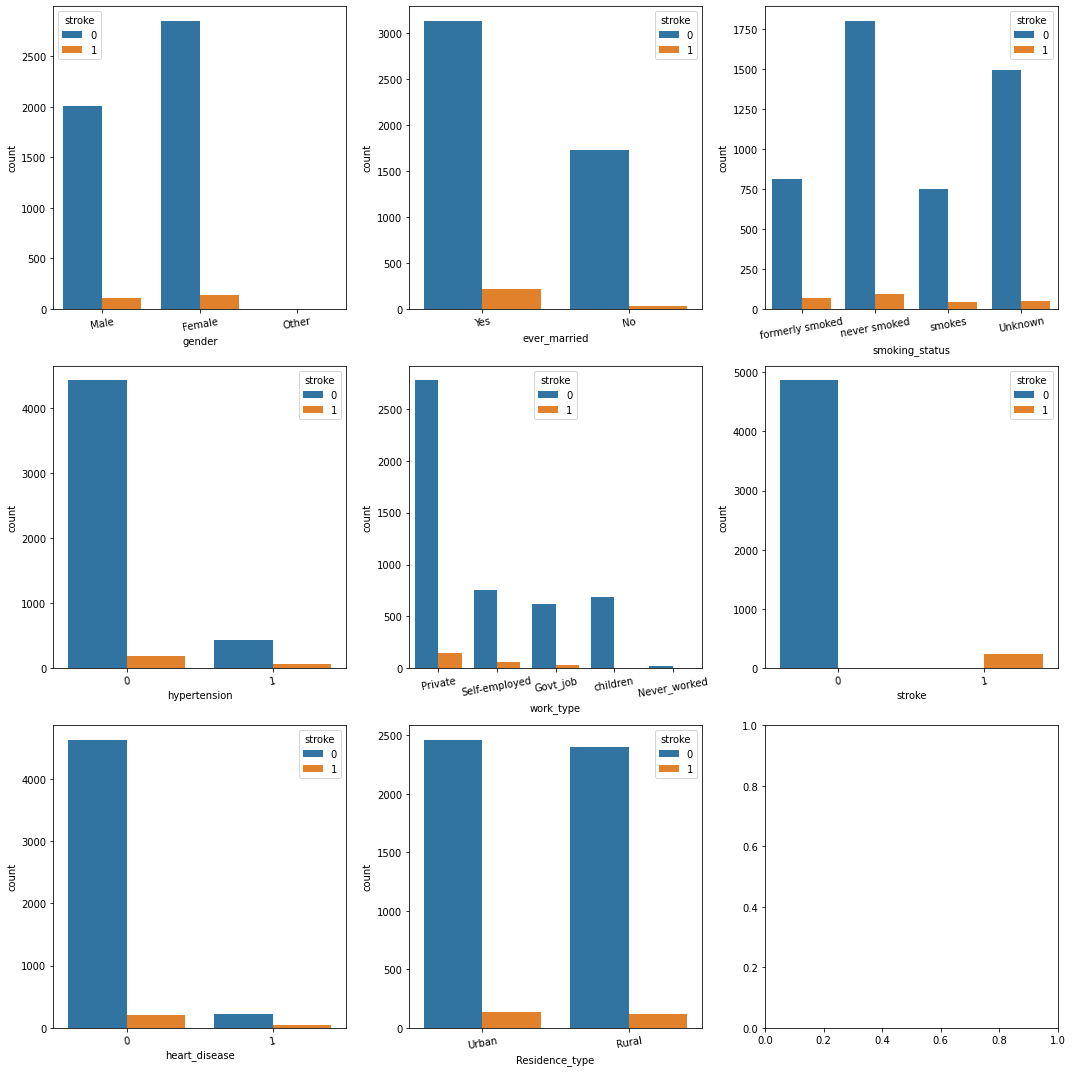

In [106]:

fig, axes = plt.subplots(3,3, figsize=(15,15))
a = 0
b = 0
for col in categorical.columns:
    sns.countplot(ax=axes[a][b], x=col, hue="stroke", data=categorical)
    fig.tight_layout() 
    axes[a][b].set_xticklabels(axes[a][b].get_xticklabels(), rotation=10)
    axes
    a+=1
    if a==3:
        a = 0
        b+=1
    
    


In [107]:
categorical[categorical.gender != "Other"]

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,0
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,Male,0,0,Yes,Private,Rural,formerly smoked,0


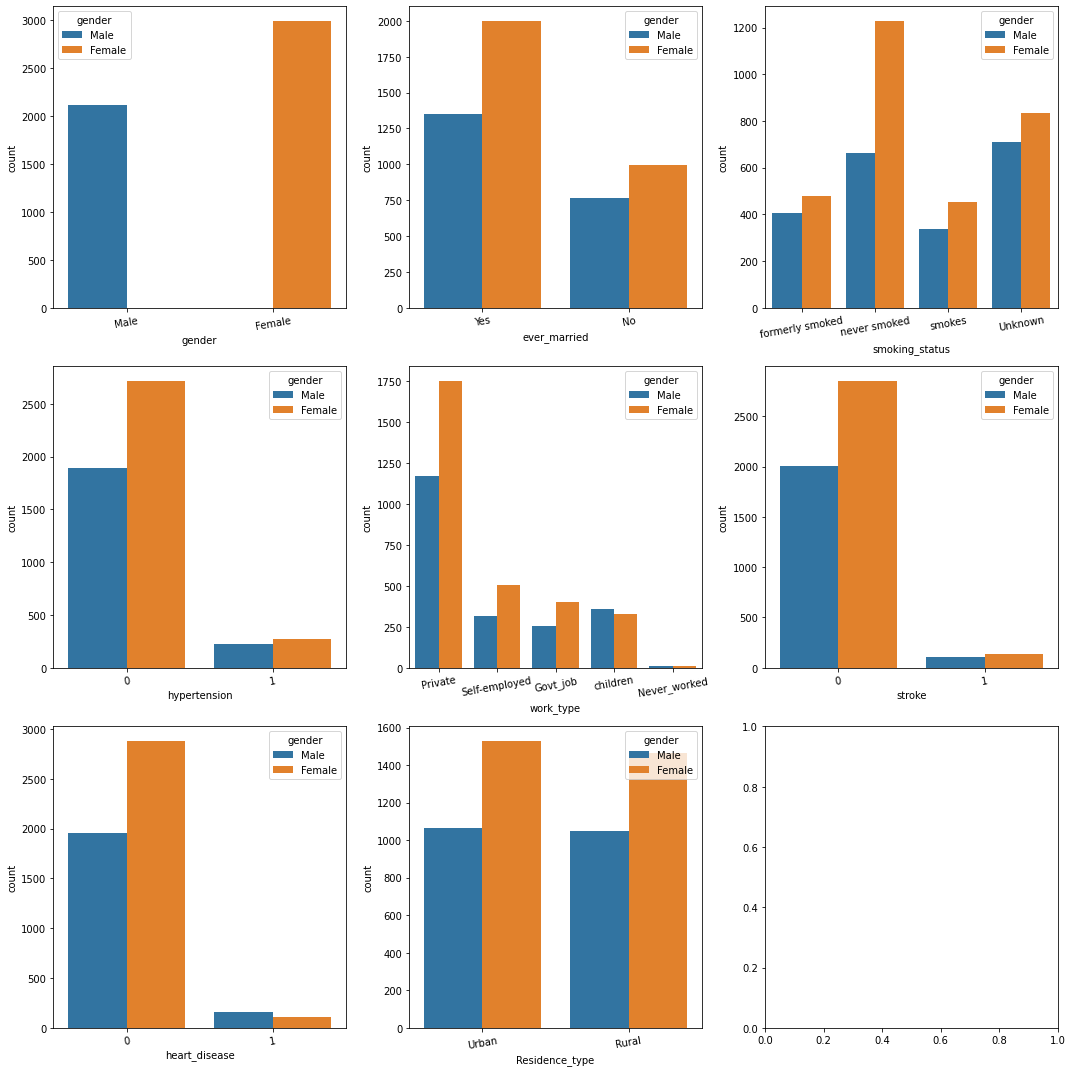

In [108]:
fig, axes = plt.subplots(3,3, figsize=(15,15))
a = 0
b = 0
for col in categorical.columns:
    sns.countplot(ax=axes[a][b], x=col, hue="gender", data= categorical[categorical.gender != "Other"])
    fig.tight_layout() 
    axes[a][b].set_xticklabels(axes[a][b].get_xticklabels(), rotation=10)
    axes
    a+=1
    if a==3:
        a = 0
        b+=1
    
    


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

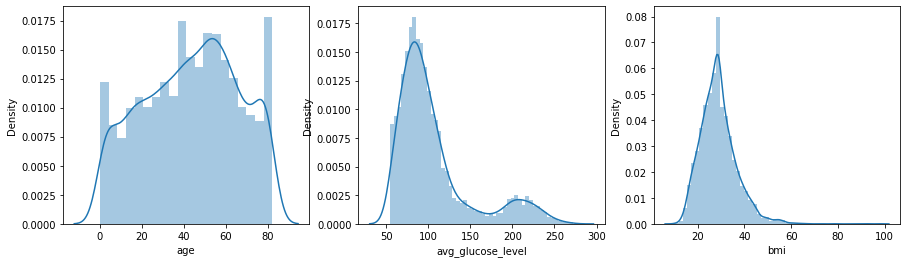

In [109]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
a = 0
for x in numerical.columns:
    sns.distplot(df[x], ax=axes[a])
    a+=1
    

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

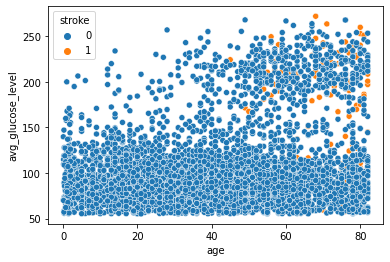

In [110]:
sns.scatterplot(x="age", y="avg_glucose_level", hue="stroke", data=df)

<AxesSubplot:>

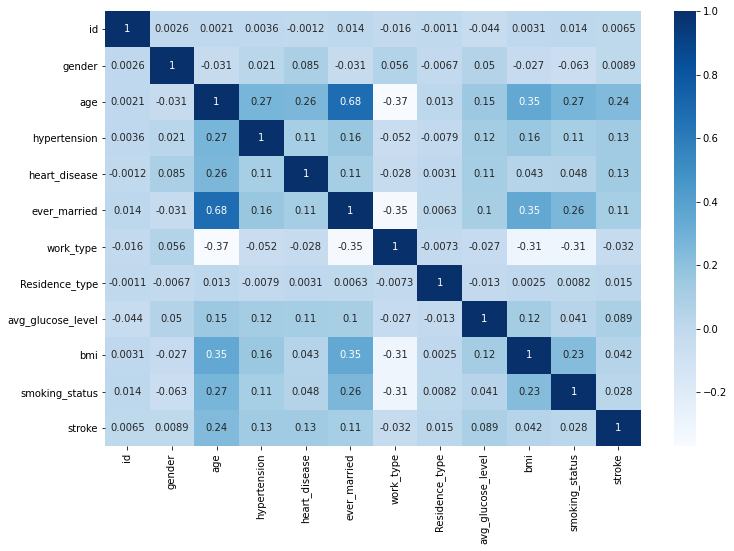

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_prep = df.apply(le.fit_transform)
corrs = df_prep.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True, cmap="Blues")

In [112]:
corrs["stroke"]

id                   0.006499
gender               0.008929
age                  0.242122
hypertension         0.127904
heart_disease        0.134914
ever_married         0.108340
work_type           -0.032316
Residence_type       0.015458
avg_glucose_level    0.088833
bmi                  0.042307
smoking_status       0.028123
stroke               1.000000
Name: stroke, dtype: float64

In [113]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

encode_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

for col in encode_cols:
    LE.fit(df[col])
    df[col] = LE.transform(df[col])

In [114]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [115]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [116]:
from imblearn.over_sampling import SMOTE

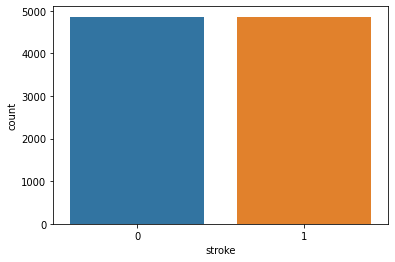

In [117]:
sampler = SMOTE(random_state = 42)
X = df.drop(['stroke'],axis=1)
y = df[['stroke']]
X,y= sampler.fit_resample(X,y['stroke'].values.ravel())
y = pd.DataFrame({'stroke':y})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [120]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

logR.fit(X_train, y_train)
logR.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7465295629820051

In [121]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state = 2 )
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8179948586118252

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators = 50, max_depth = 3, random_state = 2 )
GB.fit(X_train, y_train)
GB.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8591259640102827

In [123]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)
NB.score(X_test, y_test)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7989717223650386

In [124]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline

col_trans = make_column_transformer(
            (OneHotEncoder(),['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']),
            (StandardScaler(),['age','avg_glucose_level', 'bmi']), 
            remainder = 'passthrough') 


In [125]:
logR = LogisticRegression()

pipe = make_pipeline(col_trans, logR)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8097686375321337

In [126]:
RF = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state = 2 )

pipe = make_pipeline(col_trans, RF)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.8293059125964011

In [127]:
GB = GradientBoostingClassifier(n_estimators = 50, max_depth = 3, random_state = 2)

pipe =  make_pipeline(col_trans, GB)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8637532133676092

In [128]:
NB = GaussianNB()

pipe =  make_pipeline(col_trans, NB)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7892030848329049